<a href="https://colab.research.google.com/github/lapnguyen331/machine_leaning_lab/blob/main/Lab_4_21130419_Nguyen_Hoang_Lap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [8]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report


#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




In [77]:
# code
from sklearn import datasets
from sklearn.linear_model import LogisticRegression #import linear
from sklearn.metrics import confusion_matrix  #import matrixs để đánh giá modelfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


data1 = datasets.load_iris()
X1 = data1.data
y1= data1.target
#chia tệp thành train và test , test 30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X1,y1,test_size=0.3)
#train
regression = LogisticRegression(random_state = 0)
regression.fit(Xtrain, ytrain)
#predict y
y_pred = regression.predict(Xtest)
print ("Accuracy : ", accuracy_score(ytest, y_pred))
print("\nClassification Report:")
print(classification_report(ytest, y_pred))


Accuracy :  0.9555555555555556

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/machine_learning/lab4'

Mounted at /content/gdrive
/content/gdrive/MyDrive/machine_learning/lab4


In [99]:
# code
train_data = pd.read_csv('fashion_train.csv')
test_data = pd.read_csv('fashion_test.csv')
X_train1 = train_data.iloc[:,:784]
y_train1 = train_data.iloc[:,-1]

X_test1 = test_data.iloc[:,:784]
y_test1 = test_data.iloc[:,-1]
# train model sử dụng train set
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)


#đánh giá mô hình
accuracy1 = accuracy_score(y_test1, y_pred1)
print ("Accuracy : ", accuracy1)
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))



Accuracy :  0.783

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        91
           1       0.95      0.96      0.95        92
           2       0.59      0.71      0.65        91
           3       0.88      0.77      0.82       105
           4       0.66      0.66      0.66        99
           5       0.88      0.78      0.83       105
           6       0.51      0.43      0.47        99
           7       0.83      0.88      0.86        94
           8       0.93      0.93      0.93       115
           9       0.86      0.86      0.86       109

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000




#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


giá trị tốt nhất k: 3 - với accuracy 0.9333333333333333


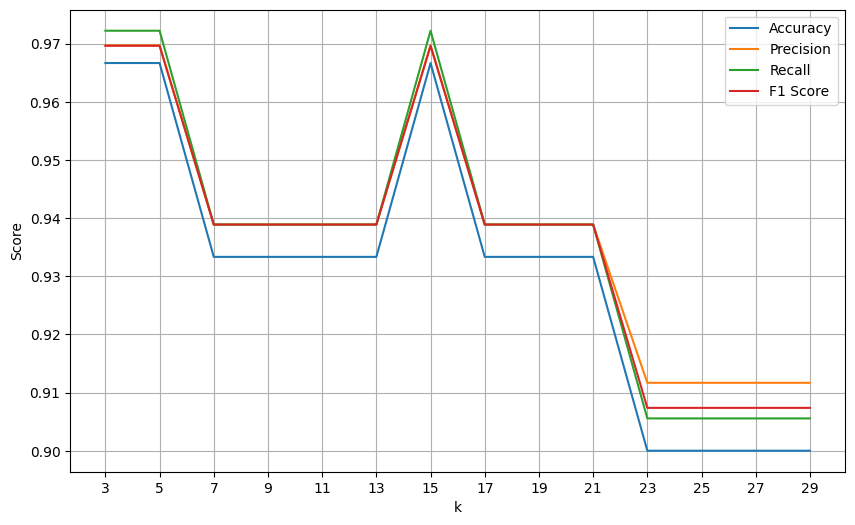

+-----------+--------------------+---------------------+
|           |     KNeighbors     | Logistic regression |
+-----------+--------------------+---------------------+
|  Accuracy | 0.9333333333333333 |  0.9555555555555556 |
| pricision | 0.9388888888888888 |  0.9606481481481483 |
|     F1    | 0.9388888888888888 |  0.9606481481481483 |
|   recall  | 0.9388888888888888 |  0.9606481481481483 |
+-----------+--------------------+---------------------+


In [126]:
# task 3.1
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data1 = datasets.load_iris()
X3 = data1.data
y3= data1.target

#tách data , 30% test 70% train
X_train2, X_test2, y_train2, y_test2 = train_test_split(
     X3, y3, test_size=30)


#kiểm tra với k range từ 3->29 step 2
k_values = range(3, 30, 2)
# tệp lưu đánh giá
accuracies =[]
precisions=[]
recalls=[]
f1_scores=[]
for k in k_values:
   knn_model = KNeighborsClassifier(n_neighbors=k)
   # train với tệp 50 50 ở trên
   knn_model.fit(X_train2, y_train2)
   # predic y
   y_pred2 = knn_model.predict(X_test2)
   # đánh giá
   accuracy = accuracy_score(y_test2, y_pred2)
   precision = precision_score(y_test2, y_pred2, average='macro')
   recall = recall_score(y_test2, y_pred2,average='macro')
   f1 = f1_score(y_test2, y_pred2, average='macro')
   #thêm vào tệp lưu
   accuracies.append(accuracy)
   precisions.append(precision)
   recalls.append(recall)
   f1_scores.append(f1)
#lấy giá trị tốt nhất
best_accuracy = np.argmax(accuracies)
best_k = k_values[best_accuracy]

print('giá trị tốt nhất k:',best_k ,'- với accuracy',accuracies[best_k])
# show với k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()
#3.2 so sánh  k best
from prettytable import PrettyTable

t = PrettyTable(['','KNeighbors', 'Logistic regression'])
t.add_row(['Accuracy',accuracies[best_k], accuracy_score(ytest, y_pred)])
t.add_row(['pricision',precisions[best_k], metrics.precision_score(ytest, y_pred, average='macro')])
t.add_row(['F1',f1_scores[best_k],metrics.f1_score(ytest, y_pred,average='macro')])
t.add_row(['recall',recalls[best_k], metrics.recall_score(ytest, y_pred,average='macro')])
print(t)



#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


giá trị tốt nhất k: 5 - với accuracy 0.752


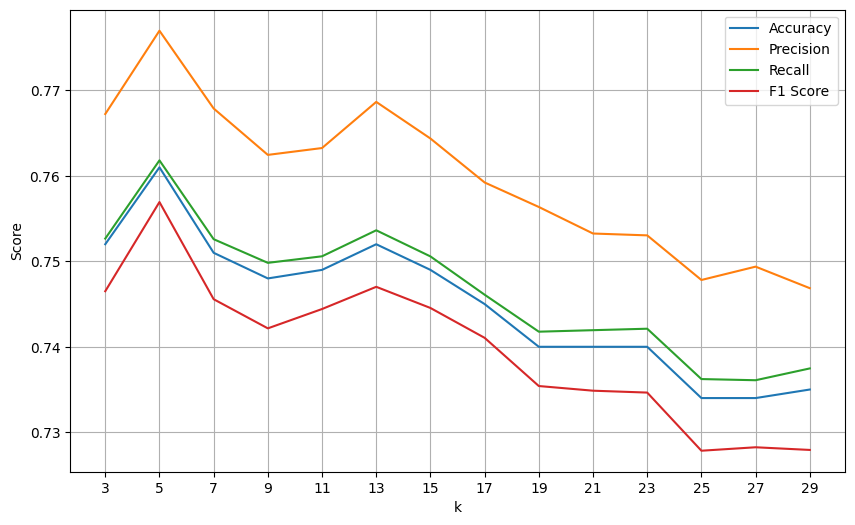

+-----------+--------------------+---------------------+
|           |     KNeighbors     | Logistic regression |
+-----------+--------------------+---------------------+
|  Accuracy |       0.752        |        0.783        |
| precision | 0.768657281971095  |  0.7805722822135391 |
|     F1    | 0.7470186833739232 |  0.7790413311115769 |
|   recall  | 0.7536326207068555 |  0.7814072147995884 |
+-----------+--------------------+---------------------+


In [104]:
# code
train_data4 = pd.read_csv('fashion_train.csv')
test_data4 = pd.read_csv('fashion_test.csv')
X_train4 = train_data4.iloc[:,:784]
y_train4 = train_data4.iloc[:,-1]

X_test4 = test_data4.iloc[:,:784]
y_test4 = test_data4.iloc[:,-1]

#kiểm tra với k range từ 3->29 step 2
k4_values = range(3, 30, 2)
# tệp lưu đánh giá
accuracies4 =[]
precisions4=[]
recalls4=[]
f1_scores4=[]
for a in k4_values:
      knn4_model = KNeighborsClassifier(n_neighbors=a)
      # train với tệp 50 50 ở trên
      knn4_model.fit(X_train4, y_train4)
      # predic y
      y_pred4 = knn4_model.predict(X_test4)
      # đánh giá
      accuracy = accuracy_score(y_test4, y_pred4)
      precision = precision_score(y_test4, y_pred4, average='macro')
      recall = recall_score(y_test4, y_pred4,average='macro')
      f1 = f1_score(y_test4, y_pred4, average='macro')
      #thêm vào tệp lưu
      accuracies4.append(accuracy)
      precisions4.append(precision)
      recalls4.append(recall)
      f1_scores4.append(f1)
#lấy giá trị tốt nhất
best_accuracy4 = np.argmax(accuracies4)
best_k4 = k4_values[best_accuracy4]

print('giá trị tốt nhất k:',best_k4 ,'- với accuracy',accuracies4[best_k4])
#k=5 tốt nhất
# show với k
plt.figure(figsize=(10, 6))
plt.plot(k4_values, accuracies4, label='Accuracy')
plt.plot(k4_values, precisions4, label='Precision')
plt.plot(k4_values, recalls4, label='Recall')
plt.plot(k4_values, f1_scores4, label='F1 Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.xticks(k4_values)
plt.legend()
plt.grid(True)
plt.show()
# vẽ pretty so sánh với regession
tb = PrettyTable(['','KNeighbors', 'Logistic regression'])
tb.add_row(['Accuracy',accuracies4[5], accuracy_score(y_test1, y_pred1)])
tb.add_row(['precision',precisions4[5], metrics.precision_score(y_test1, y_pred1, average='macro')])
tb.add_row(['F1',f1_scores4[5],metrics.f1_score(y_test1, y_pred1,average='macro')])
tb.add_row(['recall',recalls4[5], metrics.recall_score(y_test1,y_pred1,average='macro')])
print(tb)


#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# code
data5 = pd.read_csv('spambase.csv')
X5 = data5.iloc[:,:-1]
y5 = data5.iloc[:,-1]

#chia data 30-70
X_train5, X_test5,y_train5,y_test5 = train_test_split(X5,y5,test_size=0.3)

# train logistic
logistic_model5 = LogisticRegression(random_state=0);
logistic_model5.fit(X_train5,y_train5)
y_logis_pred5 = logistic_model5.predict(X_test5)
  #đánh giá
logis_accuracy = accuracy_score(y_test5, y_logis_pred5)
logis_precision = precision_score(y_test5, y_logis_pred5, average='macro')
logis_recall = recall_score(y_test5, y_logis_pred5,average='macro')
logis_f1 = f1_score(y_test5, y_logis_pred5, average='macro')
#train decision
decision_model5 = DecisionTreeClassifier(random_state=42)
decision_model5.fit(X_train5, y_train5)
y_deci_pred5 = decision_model5.predict(X_test5)
  #đánh giá
deci_accuracy = accuracy_score(y_test5, y_deci_pred5)
deci_precision = precision_score(y_test5, y_deci_pred5, average='macro')
deci_recall = recall_score(y_test5, y_deci_pred5,average='macro')
deci_f1 = f1_score(y_test5, y_deci_pred5, average='macro')
#train knn
knn_model5 = KNeighborsClassifier()
knn_model5.fit(X_train5, y_train5)
y_knn_pred5 = knn_model5.predict(X_test5)
  #đánh giá
knn_accuracy = accuracy_score(y_test5, y_knn_pred5)
knn_precision = precision_score(y_test5, y_knn_pred5, average='macro')
knn_recall = recall_score(y_test5, y_knn_pred5,average='macro')
knn_f1 = f1_score(y_test5, y_knn_pred5, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(["",'decision', 'Knn', 'logistic'])

# To insert rows:
t.add_row(['Accuracy',deci_accuracy,knn_accuracy,logis_accuracy ])
t.add_row(['Precision', deci_precision,knn_precision,logis_precision])
t.add_row(['Recall', deci_recall,knn_recall,logis_recall])
t.add_row(['f1_score', deci_f1,knn_f1,logis_f1])
print(t)

+-----------+--------------------+--------------------+--------------------+
|           |      decision      |        Knn         |      logistic      |
+-----------+--------------------+--------------------+--------------------+
|  Accuracy | 0.9102099927588704 | 0.7856625633598842 | 0.9160028964518465 |
| Precision | 0.9052792649906678 | 0.775621469679207  | 0.9117218796120599 |
|   Recall  | 0.906835364539581  | 0.7729824646279836 | 0.9122560683294556 |
|  f1_score | 0.9060379263421272 | 0.7742117938180773 | 0.911986796591024  |
+-----------+--------------------+--------------------+--------------------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.